In [2]:
import pickle

# Load Classification Data
with open('data/pickles/X_train_tensor_classification_BERT.pickle', 'rb') as f:
    X_train_tensor_classification = pickle.load(f)
with open('data/pickles/y_train_tensor_classification_BERT.pickle', 'rb') as f:
    y_train_tensor_classification = pickle.load(f)
with open('data/pickles/X_eval_tensor_classification_BERT.pickle', 'rb') as f:
    X_eval_tensor_classification = pickle.load(f)
with open('data/pickles/y_eval_tensor_classification_BERT.pickle', 'rb') as f:
    y_eval_tensor_classification = pickle.load(f)
with open('data/pickles/X_test_tensor_classification_BERT.pickle', 'rb') as f:
    X_test_tensor_classification = pickle.load(f)
with open('data/pickles/y_test_tensor_classification_BERT.pickle', 'rb') as f:
    y_test_tensor_classification = pickle.load(f)

# Load Regression Data
with open('data/pickles/X_train_tensor_regression_BERT.pickle', 'rb') as f:
    X_train_tensor_regression = pickle.load(f)
with open('data/pickles/y_train_tensor_regression_BERT.pickle', 'rb') as f:
    y_train_tensor_regression = pickle.load(f)
with open('data/pickles/X_eval_tensor_regression_BERT.pickle', 'rb') as f:
    X_eval_tensor_regression = pickle.load(f)
with open('data/pickles/y_eval_tensor_regression_BERT.pickle', 'rb') as f:
    y_eval_tensor_regression = pickle.load(f)
with open('data/pickles/X_test_tensor_regression_BERT.pickle', 'rb') as f:
    X_test_tensor_regression = pickle.load(f)
with open('data/pickles/y_test_tensor_regression_BERT.pickle', 'rb') as f:
    y_test_tensor_regression = pickle.load(f)

print('Classification Data:')
print('X_train_tensor_classification:', X_train_tensor_classification.shape)
print('y_train_tensor_classification:', y_train_tensor_classification.shape)
print('X_eval_tensor_classification:', X_eval_tensor_classification.shape)  
print('y_eval_tensor_classification:', y_eval_tensor_classification.shape)
print('X_test_tensor_classification:', X_test_tensor_classification.shape)
print('y_test_tensor_classification:', y_test_tensor_classification.shape)
print()

print('Regression Data:')
print('X_train_tensor_regression:', X_train_tensor_regression.shape)
print('y_train_tensor_regression:', y_train_tensor_regression.shape)
print('X_eval_tensor_regression:', X_eval_tensor_regression.shape)
print('y_eval_tensor_regression:', y_eval_tensor_regression.shape)
print('X_test_tensor_regression:', X_test_tensor_regression.shape)
print('y_test_tensor_regression:', y_test_tensor_regression.shape)

Classification Data:
X_train_tensor_classification: torch.Size([10275, 384])
y_train_tensor_classification: torch.Size([10275])
X_eval_tensor_classification: torch.Size([1284, 384])
y_eval_tensor_classification: torch.Size([1284])
X_test_tensor_classification: torch.Size([1285, 384])
y_test_tensor_classification: torch.Size([1285])

Regression Data:
X_train_tensor_regression: torch.Size([10275, 384])
y_train_tensor_regression: torch.Size([10275])
X_eval_tensor_regression: torch.Size([1284, 384])
y_eval_tensor_regression: torch.Size([1284])
X_test_tensor_regression: torch.Size([1285, 384])
y_test_tensor_regression: torch.Size([1285])


In [4]:
X_train_tensor_classification[0, :10]

tensor([-0.4786, -0.3771, -0.1729, -0.2300,  0.2695,  0.1055, -0.1416, -0.1594,
         0.0704, -0.1298])

In [5]:
X_train_tensor_regression[0, :10]

tensor([-0.2235, -0.4979, -0.2386, -0.2705, -0.3878,  0.1125,  0.0490, -0.0132,
         0.1137, -0.0091])

In [18]:
import torch

# Concatenate all tensors for classification and regression tasks
X_classification_all = torch.cat([X_train_tensor_classification, X_eval_tensor_classification, X_test_tensor_classification])
y_classification_all = torch.cat([y_train_tensor_classification, y_eval_tensor_classification, y_test_tensor_classification])

X_regression_all = torch.cat([X_train_tensor_regression, X_eval_tensor_regression, X_test_tensor_regression])
y_regression_all = torch.cat([y_train_tensor_regression, y_eval_tensor_regression, y_test_tensor_regression])

print('Classification Data:')
print('X_classification_all:', X_classification_all.shape)
print('y_classification_all:', y_classification_all.shape)
print()

print('Regression Data:')
print('X_regression_all:', X_regression_all.shape)
print('y_regression_all:', y_regression_all.shape)

Classification Data:
X_classification_all: torch.Size([12844, 384])
y_classification_all: torch.Size([12844])

Regression Data:
X_regression_all: torch.Size([12844, 384])
y_regression_all: torch.Size([12844])


In [21]:
import numpy as np
from tqdm import tqdm

def find_exact_matches(X1, X2):
    """
    Find indices in X2 that exactly match with each entry in X1.
    
    :param X1: First dataset (numpy array)
    :param X2: Second dataset (numpy array)
    :return: A list of indices in X2 that correspond to each entry in X1
    """
    matches = []
    for i in tqdm(range(len(X1))):
        for j in range(len(X2)):
            if np.array_equal(X1[i], X2[j]):
                matches.append(j)
                break
    return matches

In [22]:
# Convert tensors to numpy arrays for processing
X_class_all_np = X_classification_all.numpy()
X_regress_all_np = X_regression_all.numpy()

# Find matching indices (using the previously defined find_exact_matches function)
match_indices = find_exact_matches(X_class_all_np, X_regress_all_np)

y_matched_classification = y_classification_all.numpy()
y_matched_regression = y_regression_all.numpy()[match_indices]

100%|██████████| 12844/12844 [02:45<00:00, 77.66it/s]


In [23]:
print('Matches found:', len(match_indices))

Matches found: 12844


In [24]:
# Assuming you have the original sizes stored
# For example: train_size, eval_size, test_size

train_end_idx = len(X_train_tensor_classification)
eval_end_idx = len(X_train_tensor_classification) + len(X_eval_tensor_classification)

# Split the tensors back into train, eval, and test sets
X_train_rc = X_class_all_np[:train_end_idx]
y_train_rc_classification = y_matched_classification[:train_end_idx]
y_train_rc_regression = y_matched_regression[:train_end_idx]

X_eval_rc = X_class_all_np[train_end_idx:eval_end_idx]
y_eval_rc_classification = y_matched_classification[train_end_idx:eval_end_idx]
y_eval_rc_regression = y_matched_regression[train_end_idx:eval_end_idx]

X_test_rc = X_class_all_np[eval_end_idx:]
y_test_rc_classification = y_matched_classification[eval_end_idx:]
y_test_rc_regression = y_matched_regression[eval_end_idx:]

print('Classification Data:')
print('X_train_rc:', X_train_rc.shape)
print('y_train_rc_classification:', y_train_rc_classification.shape)
print('y_train_rc_regression:', y_train_rc_regression.shape)
print('X_eval_rc:', X_eval_rc.shape)
print('y_eval_rc_classification:', y_eval_rc_classification.shape)
print('y_eval_rc_regression:', y_eval_rc_regression.shape)
print('X_test_rc:', X_test_rc.shape)
print('y_test_rc_classification:', y_test_rc_classification.shape)
print('y_test_rc_regression:', y_test_rc_regression.shape)

Classification Data:
X_train_rc: (10275, 384)
y_train_rc_classification: (10275,)
y_train_rc_regression: (10275,)
X_eval_rc: (1284, 384)
y_eval_rc_classification: (1284,)
y_eval_rc_regression: (1284,)
X_test_rc: (1285, 384)
y_test_rc_classification: (1285,)
y_test_rc_regression: (1285,)


In [25]:
from torch import nn

class Regsification(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Regsification, self).__init__()
        # Shared layers
        self.base_layer1 = nn.Linear(input_size, 128)
        self.base_layer2 = nn.Linear(128, 64)
        self.relu = nn.ReLU()

        # Regression head
        self.regression_head = nn.Linear(64, 1)  # Output one value for regression

        # Classification head
        self.classification_head = nn.Linear(64, num_classes)  # Output for each class

    def forward(self, x):
        # Shared layers
        x = self.relu(self.base_layer1(x))
        x = self.relu(self.base_layer2(x))

        # Regression and classification heads
        regression_output = self.regression_head(x)
        classification_output = self.classification_head(x)

        return regression_output, classification_output

# Assuming the number of classes for classification is known
num_classes = len(np.unique(y_train_rc_classification))  # Adjust according to your label encoder if needed
input_size = X_train_rc.shape[1]

model = Regsification(input_size, num_classes)
print(model)

Regsification(
  (base_layer1): Linear(in_features=384, out_features=128, bias=True)
  (base_layer2): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (regression_head): Linear(in_features=64, out_features=1, bias=True)
  (classification_head): Linear(in_features=64, out_features=30, bias=True)
)


In [26]:
criterion_regression = nn.MSELoss()
criterion_classification = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i in range(len(X_train_rc)):
        inputs = torch.tensor(X_train_rc[i], dtype=torch.float32)
        label_regression = torch.tensor(y_train_rc_regression[i], dtype=torch.float32)
        label_classification = torch.tensor(y_train_rc_classification[i], dtype=torch.long)

        # Forward pass
        regression_output, classification_output = model(inputs)

        # Compute losses
        loss_regression = criterion_regression(regression_output, label_regression.unsqueeze(0))
        loss_classification = criterion_classification(classification_output.unsqueeze(0), label_classification.unsqueeze(0))
        total_loss = loss_regression + loss_classification

        # Backward pass and optimize
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Classification Loss: {loss_classification.item():.4f}, Regression Loss: {loss_regression.item():.4f}, Total Loss: {total_loss.item():.4f}')

/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [1/10], Total Loss: 0.9950
Epoch [2/10], Total Loss: 0.7090
Epoch [3/10], Total Loss: 0.5086
Epoch [4/10], Total Loss: 0.6029
Epoch [5/10], Total Loss: 0.3495
Epoch [6/10], Total Loss: 0.3186
Epoch [7/10], Total Loss: 0.6971
Epoch [8/10], Total Loss: 0.3197
Epoch [9/10], Total Loss: 1.6492
Epoch [10/10], Total Loss: 0.1965


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_regsification_model(model, X_data, y_data_regression, y_data_classification, label_encodes):
    model.eval()
    with torch.no_grad():
        regression_outputs = []
        classification_outputs = []
        actual_regression = []
        actual_classification = []

        for i in range(len(X_data)):
            inputs = torch.tensor(X_data[i], dtype=torch.float32)
            reg_out, class_out = model(inputs)

            regression_outputs.append(reg_out.item())
            classification_outputs.append(class_out.argmax().item())

            actual_regression.append(y_data_regression[i])
            actual_classification.append(y_data_classification[i])

        # Regression metrics
        mse = mean_squared_error(actual_regression, regression_outputs)
        mae = mean_absolute_error(actual_regression, regression_outputs)
        r2 = r2_score(actual_regression, regression_outputs)

        # Classification metrics
        classification_report_str = classification_report(actual_classification, classification_outputs, target_names=label_encodes)

        return mse, mae, r2, classification_report_str, actual_classification, classification_outputs

# Hardcoded list of class names
encoded_class_names = [
    'Account Management', 'Ads', 'Badges/Emotes', 'Bits', 'Channel Page',
    'Channel Points', 'Charity', 'Chat', 'Creator Camp', 'Creator Dashboard',
    'Creator Dashboard: Stream Manager', 'Creators and Stream Features',
    'Customer Experience', 'Developers', 'Discover', 'Extensions', 'IGDB',
    'IRL Events and Merch', 'Localization', 'Moderation', 'Purchase Management',
    'Safety', 'Subscriptions', 'Twitch Applications: Consoles',
    'Twitch Applications: Mobile', 'Twitch Applications: TV Apps',
    'Twitch Studio', 'User Accessibility', 'Video Features', 'Video Performance'
]


# Evaluate on Train set
train_mse, train_mae, train_r2, train_classification_report, y_train_actual, y_train_pred = evaluate_regsification_model(
    model, X_train_rc, y_train_rc_regression, y_train_rc_classification, encoded_class_names)

# Evaluate on Test set
test_mse, test_mae, test_r2, test_classification_report, y_test_actual, y_test_pred = evaluate_regsification_model(
    model, X_test_rc, y_test_rc_regression, y_test_rc_classification, encoded_class_names)

In [32]:
print('Regsification Regressor - Train Set')
print('Train MSE:', train_mse)
print('Train MAE:', train_mae)
print('Train R2:', train_r2)
print("Regsification Classifier - Train Set")
print(train_classification_report)

Regsification Regressor - Train Set
Train MSE: 0.01977515424892804
Train MAE: 0.09658802908436942
Train R2: -2.76435694956186
Regsification Classifier - Train Set
                                   precision    recall  f1-score   support

               Account Management       0.74      0.75      0.74       190
                              Ads       0.93      0.88      0.90       530
                    Badges/Emotes       0.87      0.85      0.86       406
                             Bits       0.79      0.77      0.78        82
                     Channel Page       0.82      0.64      0.72       274
                   Channel Points       0.72      0.90      0.80       402
                          Charity       0.97      0.91      0.94        64
                             Chat       0.81      0.75      0.78       667
                     Creator Camp       0.69      0.73      0.71        92
                Creator Dashboard       0.70      0.58      0.63       754
Creator Das

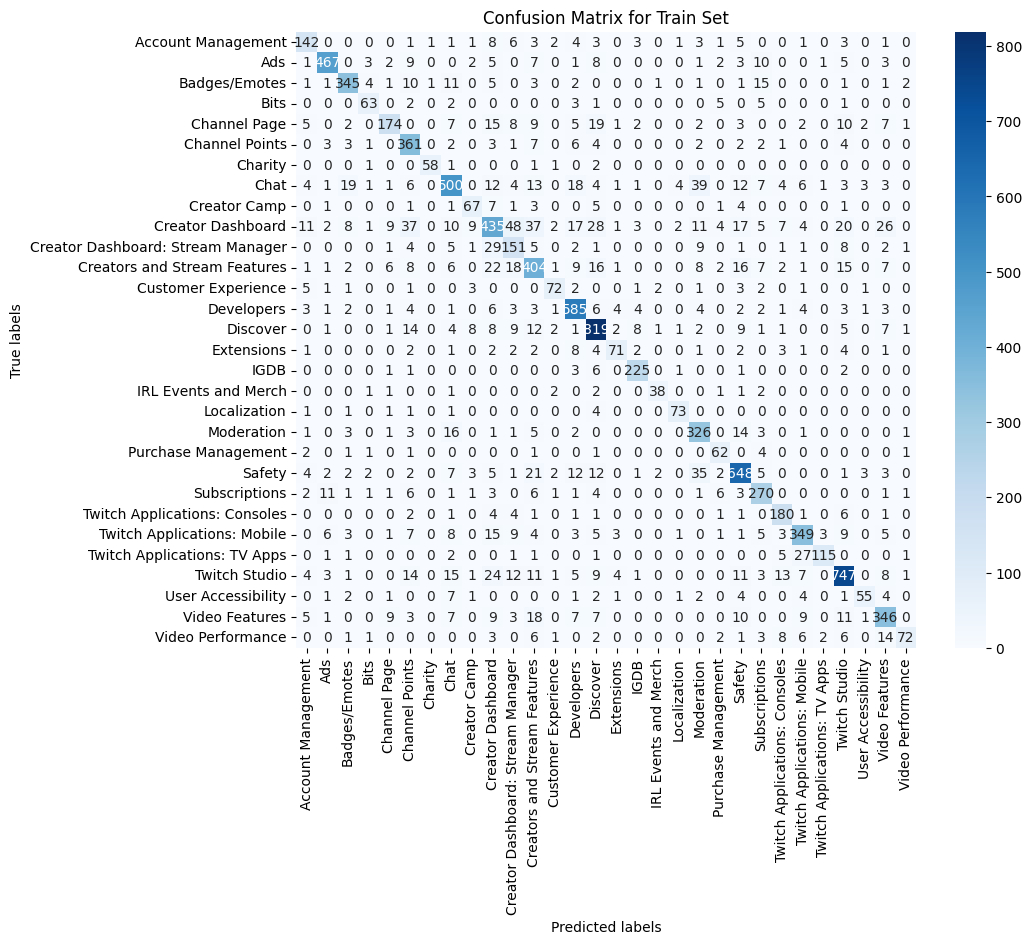

In [35]:
cm_train = confusion_matrix(y_train_actual, y_train_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', xticklabels=encoded_class_names, yticklabels=encoded_class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Train Set')
plt.show()


In [33]:
print('Regsification Regressor - Test Set')
print('Test MSE:', test_mse)
print('Test MAE:', test_mae)
print('Test R2:', test_r2)
print("Regsification Classifier - Test Set")
print(test_classification_report)

Regsification Regressor - Test Set
Test MSE: 0.02505541693905625
Test MAE: 0.10318066702278218
Test R2: -2.0812101330406674
Regsification Classifier - Test Set
                                   precision    recall  f1-score   support

               Account Management       0.45      0.61      0.52        23
                              Ads       0.75      0.73      0.74        67
                    Badges/Emotes       0.62      0.47      0.53        51
                             Bits       0.25      0.20      0.22        10
                     Channel Page       0.35      0.31      0.33        35
                   Channel Points       0.47      0.68      0.56        50
                          Charity       1.00      0.88      0.93         8
                             Chat       0.47      0.37      0.41        84
                     Creator Camp       0.31      0.36      0.33        11
                Creator Dashboard       0.30      0.28      0.29        95
Creator Dashbo

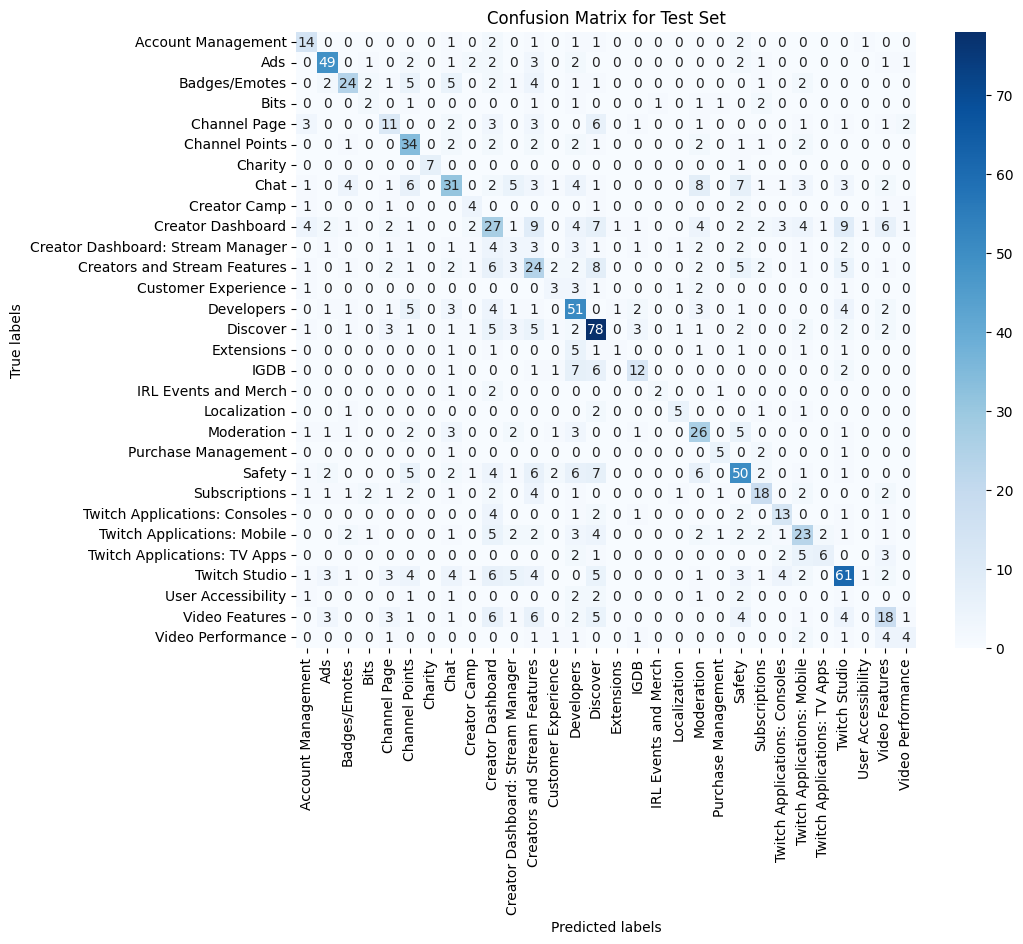

In [36]:
cm_test = confusion_matrix(y_test_actual, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=encoded_class_names, yticklabels=encoded_class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()